In [1]:
# import os
# import sys
# if sys.path[-1] != "../":
#     sys.path.append("../")
#     os.chdir("../")

import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from BIVFPQ import *

labels = {
    "portion": "Portion of Database to Scan",
    "acceleration": "Acceleration Ratio",
}

img_dir = "../../data/img/"

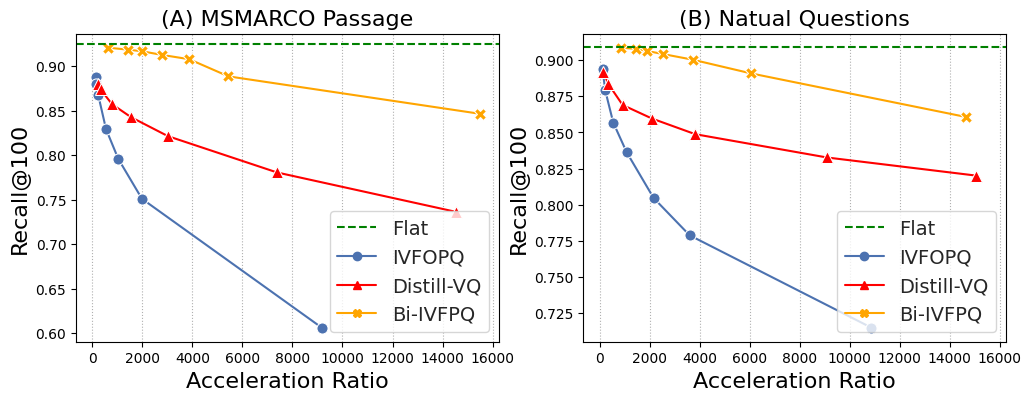

In [2]:
data_marco = pd.concat([data_ivfopq_marco, data_distillvq_marco, data_bivfpq_marco])
data_nq = pd.concat([data_ivfopq_nq, data_distillvq_nq, data_bivfpq_nq])

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex=True)
sns.set(style="white")

x = "acceleration"
palette = ["b", "red", "orange"]
label = labels[x]

ax = sns.lineplot(ax=axes[0], data=data_marco, x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=["o", "^", "X"])

ax.set_title("(A) MSMARCO Passage", fontsize=16)
ax.grid(axis='x', linestyle='dotted')
# exhaustive
ax.axhline(0.925, linestyle="--", color="green", label="Flat")

# NQ
ax = sns.lineplot(ax=axes[1], data=data_nq, x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=["o", "^", "X"])

ax.set_title("(B) Natual Questions", fontsize=16)
ax.grid(axis='x', linestyle='dotted')
# exhaustive
ax.axhline(0.909, linestyle="--", color="green", label="Flat")

for ax in axes:
    ax.set_xlabel(label, fontsize=16)
    ax.set_ylabel("Recall@100", fontsize=16)

    ax.legend()
    handles, texts = ax.get_legend_handles_labels()
    order = [3,0,1,2]
    ax.legend([handles[i] for i in order], [texts[i] for i in order], loc="lower right", fontsize=14)

fig.savefig(f'{img_dir}/tradeoff.pdf',format='pdf',dpi=1200, bbox_inches='tight')

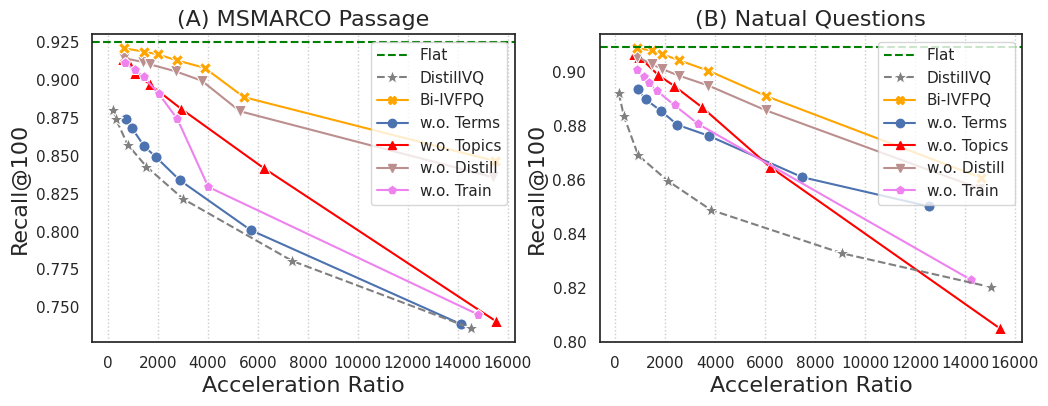

In [3]:
data_marco = pd.concat([data_noterms_marco, data_notopics_marco, data_nodistill_marco, data_notrain_marco, data_bivfpq_marco])
data_nq = pd.concat([data_noterms_nq, data_notopics_nq, data_nodistill_nq, data_notrain_nq, data_bivfpq_nq])

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharex=True)
sns.set(style="white")

x = "acceleration"
palette = ["b", "red", "rosybrown", "violet", "orange"]
markers = ["o", "^", "v", "p", "X"]
label = labels[x]

ax = sns.lineplot(ax=axes[0], data=data_marco, x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=markers)
ax = sns.lineplot(ax=ax, data=data_distillvq_marco, x=x, y="recall", linestyle="--", markersize=10, color="gray", marker="*", label="DistillVQ")
ax.axhline(0.925, linestyle="--", color="green", label="Flat")
ax.set_title("(A) MSMARCO Passage", fontsize=16)

ax = sns.lineplot(ax=axes[1], data=data_nq, x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=markers)
ax = sns.lineplot(ax=ax, data=data_distillvq_nq, x=x, y="recall", linestyle="--", markersize=10, color="gray", marker="*", label="DistillVQ")
ax.axhline(0.909, linestyle="--", color="green", label="Flat")
ax.set_title("(B) Natual Questions", fontsize=16)

# ax = sns.lineplot(ax=axes[1, 0], data=data_marco, x=x, y="recall_sm", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=markers)
# ax = sns.lineplot(ax=axes[1, 1], data=data_nq, x=x, y="recall_sm", dashes=False, markersize=8, hue="method", style="method", palette=palette, markers=markers)

for ax in axes.reshape(-1):
    ax.set_xlabel(label, fontsize=16)
    ax.set_ylabel("Recall@100", fontsize=16)
    ax.grid(axis='x', linestyle='dotted')

    ax.legend()
    handles, texts = ax.get_legend_handles_labels()
    order = [6,5,4,0,1,2,3]
    ax.legend([handles[i] for i in order], [texts[i] for i in order], loc="upper right")

fig.savefig(f'{img_dir}/ablation.pdf',format='pdf',dpi=1200, bbox_inches='tight')

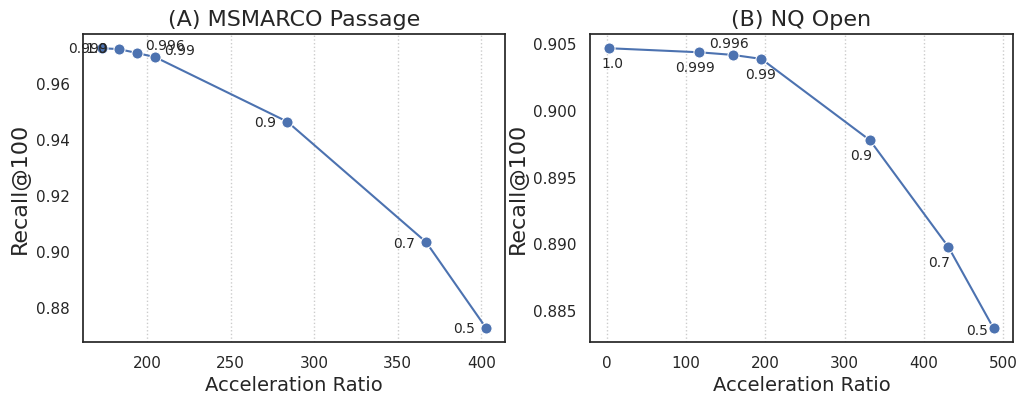

In [13]:
performance = """
0.3659|0.6183|0.821|0.8728|0.12|21915|0.5|1
0.377|0.6406|0.8498|0.9035|0.13|24083|0.7|2
0.3928|0.6703|0.8907|0.9464|0.17|31151|0.9|3
0.3978|0.6812|0.9094|0.9694|0.23|43201|0.99|4
0.398|0.6817|0.9103|0.9709|0.25|45683|0.996|5
0.398|0.6819|0.9112|0.9723|0.26|48209|0.999|6
0.3979|0.6818|0.9113|0.9726|0.28|51216|1|10
"""

all_doc_count = 8841823

data_marco = []
for i,line in enumerate(performance.strip().split("\n")):
    fields = line.split("|")
    recall = float(fields[-5])
    posting_length = int(fields[-3])
    posting_prune = float(fields[-2])
    data_marco.append({
        "recall": recall,
        "posting_length": posting_length,
        "fake_x": float(fields[-1]),
        "posting_prune": posting_prune,
        "portion": posting_length / all_doc_count,
        "acceleration": round(all_doc_count / posting_length),
    })
data_marco = pd.DataFrame(data_marco)

performance = """
0.7609|0.8089|0.8385|0.8837|0.1|43021|0.5|1
0.7668|0.8163|0.8468|0.8898|0.11|48806|0.7|2
0.7734|0.8249|0.8551|0.8978|0.14|63210|0.9|3
0.7787|0.8316|0.8609|0.9039|0.25|108008|0.99|4
0.7795|0.8319|0.8607|0.9042|0.3|132415|0.996|5
0.7792|0.8321|0.8609|0.9044|0.42|181919|0.999|6
0.7792|0.8321|0.8611|0.9047|15.81|6920138|1|10
"""

all_doc_count = 21015324

data_nq = []
for i,line in enumerate(performance.strip().split("\n")):
    fields = line.split("|")
    recall = float(fields[-5])
    posting_length = int(fields[-3])
    posting_prune = float(fields[-2])
    data_nq.append({
        "recall": recall,
        "posting_length": posting_length,
        "fake_x": float(fields[-1]),
        "posting_prune": posting_prune,
        "portion": posting_length / all_doc_count,
        "acceleration": round(all_doc_count / posting_length),
    })
data_nq = pd.DataFrame(data_nq)

sns.set(style="white")
fig, axes = plt.subplots(1, 2, figsize=(12,4))

x = "acceleration"
label = labels[x]

ax = sns.lineplot(ax=axes[0], data=data_marco, x=x, y="recall", dashes=False, markersize=8, marker="o")
ax.set_title("(A) MSMARCO Passage", fontsize=16)

for i, point in data_marco.iterrows():
    if i == 0:
        ax.text(point[x]-20, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)
    elif i in [1,2]:
        ax.text(point[x]-20, point["recall"]-0.002, str(point["posting_prune"]), fontsize=10)
    elif i == 3:
        ax.text(point[x]+5, point["recall"]+0.001, str(point["posting_prune"]), fontsize=10)
    elif i == 4:
        ax.text(point[x]+5, point["recall"]+0.001, str(point["posting_prune"]), fontsize=10)
    elif i == 5:
        ax.text(point[x]-30, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)
    else:
        ax.text(point[x]-10, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)

ax = sns.lineplot(ax=axes[1], data=data_nq, x=x, y="recall", dashes=False, markersize=8, marker="o")
ax.set_title("(B) NQ Open", fontsize=16)

for i, point in data_nq.iterrows():
    if i == 0:
        ax.text(point[x]-35, point["recall"]-0.0005, str(point["posting_prune"]), fontsize=10)
    elif i in [1,2]:
        ax.text(point[x]-25, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)
    elif i == 3:
        ax.text(point[x]-20, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)
    elif i == 4:
        ax.text(point[x]-30, point["recall"]+0.0005, str(point["posting_prune"]), fontsize=10)
    elif i == 5:
        ax.text(point[x]-30, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)
    else:
        ax.text(point[x]-10, point["recall"]-0.0015, str(point["posting_prune"]), fontsize=10)


for ax in axes:
    ax.grid(axis='x', linestyle='dotted')
    ax.set_xlabel(label, fontsize=14)
    ax.set_ylabel("Recall@100", fontsize=16)

# ax = sns.lineplot(data=data_nq, x=x, y="recall", dashes=False, markersize=8, marker="o")
# ax.grid(axis='x', linestyle='dotted')
# ax.set_xlabel(label, fontsize=16)
# ax.set_ylabel("Recall@100", fontsize=16)

fig.savefig(f'{img_dir}/posting-prune.pdf',format='pdf',dpi=1200, bbox_inches='tight')

In [4]:
ivf_performance="""
0.3655|0.618|0.8327|0.8893|52914
0.3741|0.6347|0.8552|0.9128|104705
0.3814|0.6517|0.8785|0.9372|258190
0.3854|0.6605|0.8906|0.9497|511278
0.3896|0.6689|0.901|0.9606|1010452
0.3914|0.6731|0.907|0.9666|1985393
"""

tfidf_performance = """
0.272|0.4312|0.5203|0.5341|5887
0.3065|0.5009|0.6226|0.6447|11246
0.3536|0.5885|0.7567|0.7915|26709
0.3829|0.6508|0.8581|0.9083|87981
"""

uni_performance = """
|2|50|0.3824|0.6519|0.8753|0.9341|
|2|100|0.3857|0.659|0.8864|0.9457|
|2|250|0.3882|0.6662|0.8976|0.958|
|2|500|0.3899|0.6704|0.9038|0.9645|
|2|1000|0.3922|0.6744|0.9098|0.9709|
|2|1500|0.3934|0.6767|0.9125|0.9739|
|4|50|0.3843|0.6579|0.884|0.9441|
|4|100|0.3872|0.6634|0.8933|0.9536|
|4|250|0.3892|0.6688|0.9022|0.9632|
|4|500|0.3907|0.6725|0.9071|0.9682|
|4|1000|0.3927|0.6757|0.9118|0.9732|
|4|1500|0.3935|0.6773|0.9138|0.9755|
|8|50|0.389|0.6669|0.8977|0.9589|
|8|100|0.3906|0.6701|0.9032|0.9644|
|8|250|0.392|0.6733|0.9085|0.9702|
|8|500|0.3925|0.6755|0.9113|0.9731|
|8|1000|0.3937|0.6777|0.9147|0.9768|
|8|1500|0.394|0.6785|0.9159|0.9783|
"""

all_doc_count = 8841823

ivf_data = []
for i,line in enumerate(ivf_performance.strip().split("\n")):
    fields = line.split("|")
    recall = float(fields[-3])
    posting_length = int(fields[-1])
    ivf_data.append({
        "method": "IVFFlat",
        "recall": recall,
        "posting_length": posting_length,
        "portion": posting_length / all_doc_count,
        "acceleration": round(all_doc_count / posting_length),
    })

bm25_data = []
for i,line in enumerate(tfidf_performance.strip().split("\n")):
    fields = line.split("|")
    recall = float(fields[-3])
    posting_length = int(fields[-1])
    bm25_data.append({
        "method": "BM25",
        "recall": recall,
        "posting_length": posting_length,
        "portion": posting_length / all_doc_count,
        "acceleration": round(all_doc_count / posting_length),
    })

uni_data = []
for i,line in enumerate(uni_performance.strip().split("\n")):
    fields = line.split("|")
    recall = float(fields[-3])
    tgk = int(fields[1])
    j = int(math.log2(float(fields[1]))) - 1
    posting_length = bm25_data[j]["posting_length"] + ivf_data[i % 6]["posting_length"]
    
    uni_data.append({
        "method": f"IVF+TFIDF_{tgk}",
        "recall": recall,
        "posting_length": posting_length,
        "portion": posting_length / all_doc_count,
        "acceleration": round(all_doc_count / posting_length),
    })

data = pd.DataFrame(ivf_data + uni_data)

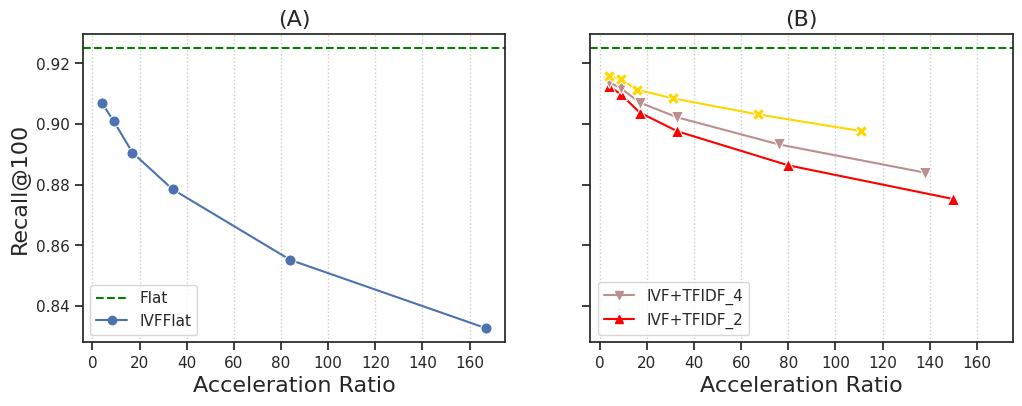

In [5]:
sns.set_theme(style="ticks")
fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True, sharex=True)

x = "acceleration"
label = labels[x]

ax = sns.lineplot(ax=axes[0], data=pd.DataFrame(ivf_data), x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=["b"], markers=["o"])
ax.axhline(0.925, linestyle="--", color="green", label="Flat")
ax.set_title("(A)", fontsize=16)

ax = sns.lineplot(ax=axes[1], data=pd.DataFrame(uni_data), x=x, y="recall", dashes=False, markersize=8, hue="method", style="method", palette=["red","rosybrown","gold"], markers=["^", "v", "X"])
ax.axhline(0.925, linestyle="--", color="green", label="Flat")
ax.set_title("(B)", fontsize=16)

for ax in axes:
    ax.grid(axis='x', linestyle='dotted')
    ax.legend(fontsize=14)
    ax.set_xlabel(label, fontsize=16)
    ax.set_ylabel("Recall@100", fontsize=16)

    handles, texts = ax.get_legend_handles_labels()
    order = [1,0]
    ax.legend([handles[i] for i in order], [texts[i] for i in order])

fig.savefig(f'{img_dir}/curve.pdf',format='pdf',dpi=1200, bbox_inches='tight')